# Arctic Project: Future Predict in Nerual Networks

## Load libraries

In [1]:
library(MASS)
library(tidyverse)
library(neuralnet)

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [2]:
arctic <- read.csv("arctic_data.csv",stringsAsFactors = F)
future_data <- read.csv("future_dataset.csv",stringsAsFactors = F)
visulization_data <- read.csv("visulization2.csv",stringsAsFactors = F)
tool <- read.csv("tool2.csv",stringsAsFactors = F)

In [3]:
model = neuralnet(Extent~Rainfall+Daylight+Population+CO2+Ozone
               +OceanTemperature_NorthernHemisphere
               +LandTemperature_NorthernHemisphere
               +MinTemperature_NorthSlopeAlaska
               +GDP_WORLD,
               data=arctic, hidden = c(9,7,5,4,3)) # hidden = c(9,7,5,4,3) => mse=0.00100666

In [4]:
pred <- cbind(tool,as.data.frame(predict(model,future_data)))

In [5]:
pred["prediction"] <- (pred$V1*(16.09-3.57)+3.57)

In [6]:
result <- left_join(visulization_data, pred, by="observation")
result

observation,Extent,Ave,X,X.1,V1,prediction
<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,14.86304,NA,NA,NA,NA,NA
2,15.96480,NA,NA,NA,NA,NA
3,16.03992,NA,NA,NA,NA,NA
4,15.42644,NA,NA,NA,NA,NA
5,13.78632,NA,NA,NA,NA,NA
6,12.19628,12.35,NA,NA,NA,NA
7,10.10544,NA,NA,NA,NA,NA
8,7.97704,NA,NA,NA,NA,NA
9,7.66404,NA,NA,NA,NA,NA


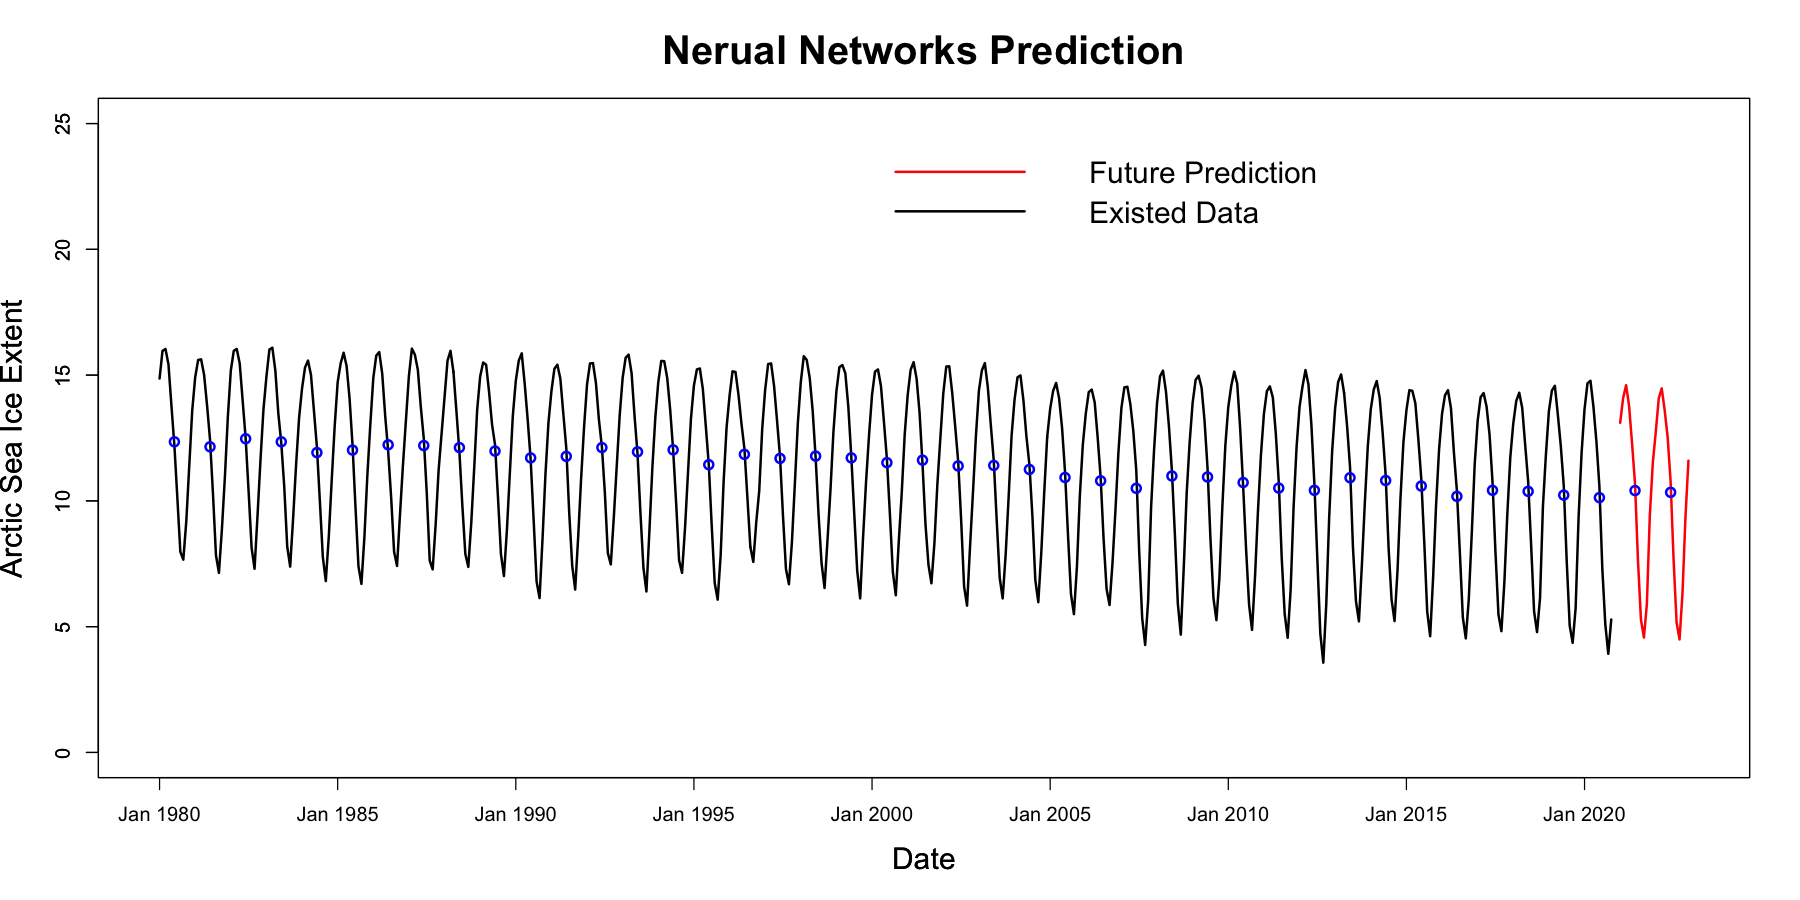

In [13]:
# figure size
options(repr.plot.width=15, repr.plot.height=7.5)

# plot
plot(result$observation,result$Extent,type ='l',ylim = c(0,25),lwd = '2',
     xlab = "Date", ylab = "Arctic Sea Ice Extent",xaxt='n',cex.lab = 1.5)

# attributes of prediction lines
lines(result$observation,result$prediction,lty=1,col='red',lwd = '2')
par(new=TRUE)
plot(result$observation,result$Ave,lty=1,col='blue',lwd = '2',ylim = c(0,25),xaxt='n',
     xlab = "Date", ylab = "Arctic Sea Ice Extent",cex.lab = 1.5)

# x-axis labels
axis(1,at=c(1,61,121,181,241,301,361,421,481),
   labels=c("Jan 1980","Jan 1985","Jan 1990","Jan 1995","Jan 2000","Jan 2005","Jan 2010","Jan 2015","Jan 2020"))

# title
title(main = list("Nerual Networks Prediction", cex = 2, col = "black", font = 2))

# legend
legend("topright",inset=.05,c("Future Prediction","Existed Data"),
       bty = 'n',lty=c(1, 1),col=c("red", "black"),lwd =c(2, 2),cex = 1.5)